[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.84608517 3.195071   ... 3.43532929 1.96766465 0.        ]
 [0.         3.18926968 5.68673581 ... 6.1729877  3.43532929 0.        ]
 ...
 [0.         0.         0.         ... 5.68673581 3.195071   0.        ]
 [0.         0.         0.         ... 3.18926968 1.84608517 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
      Elapsed time : 0.198328 seconds
 ==== Maximum value of U : 59.40023771 
 ==== Minimum value of U : -0.00000000 


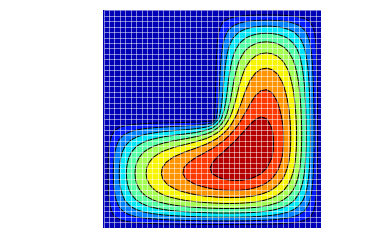

In [36]:
# -------------------------------------------------------------------------
#
# PYTHON for DUMMIES 18-19
# Problème 11
#
# Canevas de départ....
#
# -------------------------------------------------------------------------
# 
# VOUS POUVEZ IMPORTER TOUS LES PACKAGES PRESENTS SUR LE SERVEUR

from numpy import *
from numpy.linalg import solve

import matplotlib.pyplot as plt
import matplotlib

from timeit import default_timer as timer


#
# A MODIFIER
#     - pour modifier le demaine de calcul en retirant
#       le coin supérieur droit
#     - pour tirer profit du caractère creux de la matrice
#
#


def poissonSolve(nCut):
    n = 2*nCut + 1; m = n*n; h = 2/(n-1) 
    A = eye(m); B = zeros(m)
    for i in range(1,n-1): #balaye de gauche à droite
        for j in range(1,n-1): #Balaye de haut en bas
            if i > nCut or j < nCut: #Comme on balye de gauche à droite et de haut en bas. Il faut remplit la matrice lorsque qu'on est en bas à gauche (j > nCut), en bas à droite (i> nCut et j>nCut), en haut à droitre (i>nCut)
                index = i + j*n #Indexification du tableau
                A[index,index] = 4.0
                A[index,index-1] = -1.0
                A[index,index+1] = -1.0
                A[index,index-n] = -1.0
                A[index,index+n] = -1.0
                B[index] = 1
    return solve(A,B).reshape(n,n) #Le solve(A,B) retourne un vecteur, la méthode reshape permet de reconstruire la matrice de noeud nx*ny



# -------------------------------------------------------------------------
#
# PYTHON for DUMMIES 18-19
# Problème 11
#
# Script de test
#  Vincent Legat
#
# -------------------------------------------------------------------------
#



n = 20
tic = timer()
U = poissonSolve(n) 
print(U)
print("      Elapsed time : %f seconds" % (timer() - tic))
print(" ==== Maximum value of U : %10.8f " % amax(U))
print(" ==== Minimum value of U : %10.8f " % amin(U))


matplotlib.rcParams['toolbar'] = 'None'
myColorMap = matplotlib.cm.jet


X = linspace(-1,1,2*n+1); U = abs(U)
plt.figure("Python as Matlab clone...")
plt.contourf(X,X,U,10,cmap=myColorMap)
plt.contour(X,X,U,10,colors='k',linewidths=1)
plt.hlines(X,X.min(),X.max(),color='white',linewidths=0.5)
plt.vlines(X,X.min(),X.max(),color='white',linewidths=0.5)
plt.axis("off"); plt.axis("equal")
plt.show()